In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from scipy import ndimage
import cv2
import random
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# **Convolution Examples**

In [2]:
data1 = np.array([
   [3, 0, 1, 2, 7, 4],
   [1, 5, 8, 9, 3, 1],
   [2, 7, 2, 5, 1, 3],
   [0, 1, 3, 1, 7, 8],
   [4, 2, 1, 6, 2, 8],
   [2, 4, 5, 2, 3, 9]])

data2 = np.array([
   [10, 10, 10, 0, 0, 0],
   [10, 10, 10, 0, 0, 0],
   [10, 10, 10, 0, 0, 0],
   [10, 10, 10, 0, 0, 0],
   [10, 10, 10, 0, 0, 0],
   [10, 10, 10, 0, 0, 0]])

kernel = np.array([
   [1,0,-1],
   [1,0,-1],
   [1,0,-1]])


In [3]:
res1 = ndimage.convolve(data1, kernel)
print(res1)

res2 = ndimage.convolve(data2, kernel)
print(res2)


[[-2  3  8  7 -4 -8]
 [ 6  5  4  0 -8 -3]
 [10 10  2 -2 -3  1]
 [ 4  0  2  4  7  9]
 [ 1  3  2  3 16 13]
 [ 2  3  0 -3 16 18]]
[[  0   0 -30 -30   0   0]
 [  0   0 -30 -30   0   0]
 [  0   0 -30 -30   0   0]
 [  0   0 -30 -30   0   0]
 [  0   0 -30 -30   0   0]
 [  0   0 -30 -30   0   0]]


# **Image Processing using Convolution**

## Load Image Data

Images are 2D arrays of pixel values. A grayscale image consists of 1 value (0-255) at each (x,y) location. A color image consistes of 3 channels R,G,B. Hence, there are 3 values (0-255) at each location (x,y).

In [19]:
basePath = "/content/drive/My Drive/Colab Notebooks/"

img = cv2.imread(basePath + 'utsa-npb.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img)


[[[ 44 125 178]
  [ 44 125 178]
  [ 44 125 178]
  ...
  [ 54  71  87]
  [ 55  57  54]
  [ 48  49  51]]

 [[ 45 126 179]
  [ 46 127 180]
  [ 45 126 181]
  ...
  [ 54  71  87]
  [ 57  59  56]
  [ 47  51  54]]

 [[ 44 125 178]
  [ 45 126 181]
  [ 45 126 181]
  ...
  [ 56  73  89]
  [ 59  61  58]
  [ 46  50  53]]

 ...

 [[114 100  71]
  [142 124  78]
  [151 130  75]
  ...
  [245 202 157]
  [249 205 140]
  [245 208 153]]

 [[ 93  82  37]
  [ 67  45  32]
  [ 61  36  31]
  ...
  [239 208 144]
  [242 201 149]
  [249 200 157]]

 [[ 44  29  10]
  [ 60  40  29]
  [ 32  15   7]
  ...
  [235 176 116]
  [241 180 136]
  [246 204 162]]]


## Convolution Kernels

An image kernel is a small matrix used to apply effects of images. Kernels can be of different sizes 3x3, 5x5, 7x7 - generally odd numbers and square matrices. Following code shows a few kernels and the implementation of those on an image of the UTSA NPB building. You can also view some other kernel examples [here](https://setosa.io/ev/image-kernels/). 

In [17]:

# Gaussian Blur
kernel0 = (1/16)*np.array([
   [1,2,1],
   [2,4,2],
   [1,2,1]])

# Box Blur - XY
kernel1 = (1/9)*np.array([
   [1,1,1],
   [1,1,1],
   [1,1,1]])

# Box Blur - X
kernel2 = (1/3)*np.array([
   [0,0,0],
   [1,1,1],
   [0,0,0]])

# Box Blur - Y
kernel3 = (1/3)*np.array([
   [0,1,0],
   [0,1,0],
   [0,1,0]])

# Vertical Edges
kernel4 = np.array([
   [1,0,-1],
   [1,0,-1],
   [1,0,-1]])

# Horizontal Edges
kernel5 = np.array([
   [1,1,1],
   [0,0,0],
   [-1,-1,-1]])

# Edges - 1
kernel6 = np.array([
   [0,-1,0],
   [-1,4,-1],
   [0,-1,0]])

# Edges - 2
kernel7 = np.array([
   [-1,-1,-1],
   [-1,8,-1],
   [-1,-1,-1]])

# Sharpen Blurred Image
kernel8 = np.array([
   [0,-1,0],
   [-1,5,-1],
   [0,-1,0]])

# Emboss
kernel9 = np.array([
   [-2,-1,0],
   [-1,1,1],
   [0,1,2]])

out0 = cv2.filter2D(img, -1, kernel0)
out1 = cv2.filter2D(img, -1, kernel1)
out2 = cv2.filter2D(img, -1, kernel2)
out3 = cv2.filter2D(img, -1, kernel3)
out4 = cv2.filter2D(img, -1, kernel4)
out5 = cv2.filter2D(img, -1, kernel5)
out6 = cv2.filter2D(img, -1, kernel6)
out7 = cv2.filter2D(img, -1, kernel7)
out8 = cv2.filter2D(out0, -1, kernel8)
out9 = cv2.filter2D(img, -1, kernel9)


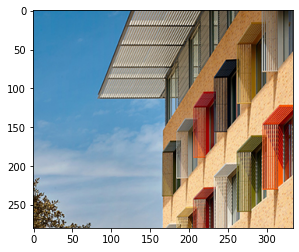

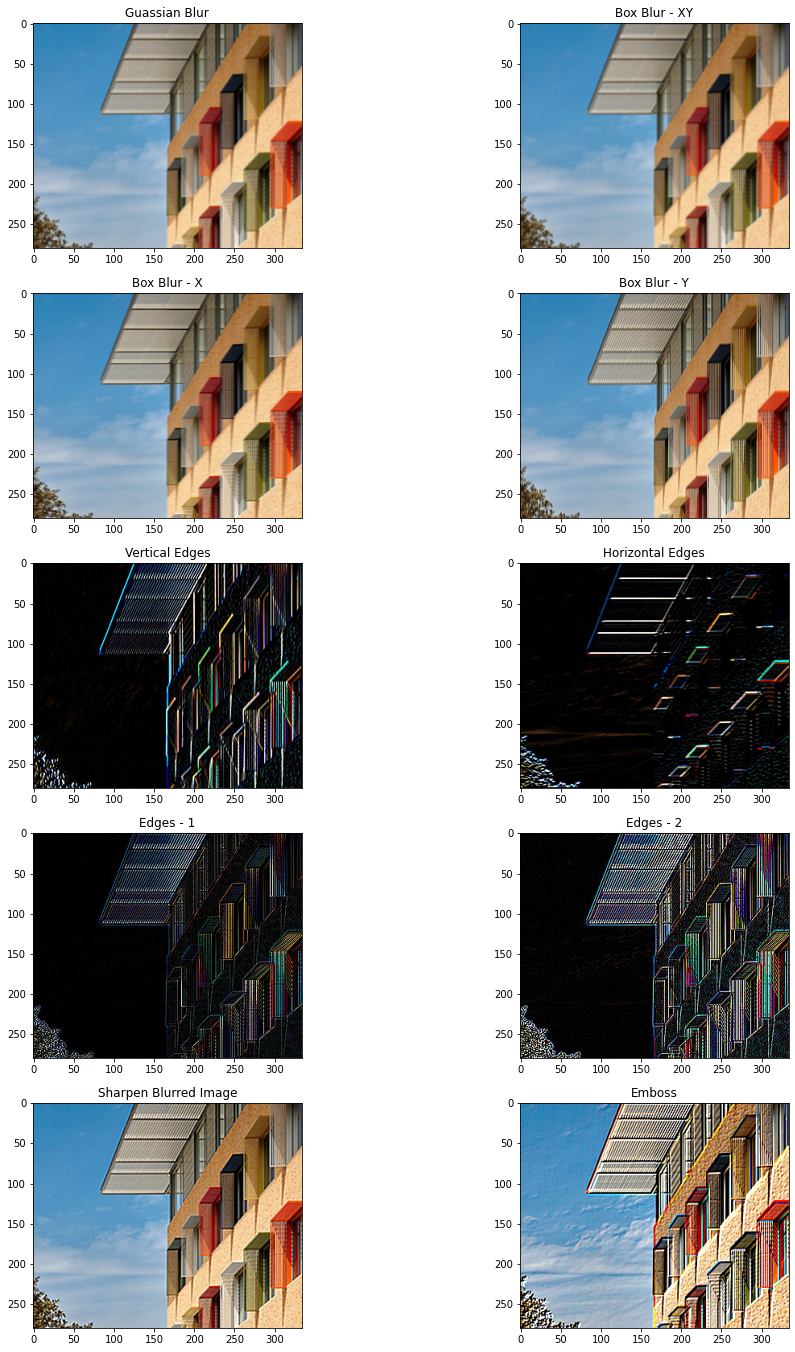

In [18]:
plt.imshow(img)
plt.show()

plt.figure(figsize=(16,24))
plt.subplot(521), plt.imshow(out0), plt.title('Guassian Blur')
plt.subplot(522), plt.imshow(out1), plt.title('Box Blur - XY')
plt.subplot(523), plt.imshow(out2), plt.title('Box Blur - X')
plt.subplot(524), plt.imshow(out3), plt.title('Box Blur - Y')
plt.subplot(525), plt.imshow(out4), plt.title('Vertical Edges')
plt.subplot(526), plt.imshow(out5), plt.title('Horizontal Edges')
plt.subplot(527), plt.imshow(out6), plt.title('Edges - 1')
plt.subplot(528), plt.imshow(out7), plt.title('Edges - 2')
plt.subplot(529), plt.imshow(out8), plt.title('Sharpen Blurred Image')
plt.subplot(5,2,10), plt.imshow(out9), plt.title('Emboss')
plt.show()
